In [1]:
############# Packages #############
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
########### plt ##########
plt.rcParams["font.family"] = "serif"       # fonts
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 18              
plt.rcParams["mathtext.cal"] = "serif"      
plt.rcParams["mathtext.rm"] = "serif"       
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"  
plt.rcParams["mathtext.fontset"] = "cm"     
#################################

In [2]:
def dynamics(mu, x):
    return mu - x**2

def plot_dynamics(x):
    mu_lst = [-1.0, 0.0, 1.0]
    dyn_mu = []
    for mu in mu_lst:
        dyn_mu.append(dynamics(mu, x))
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    for i in range(len(mu_lst)):
        axes[i].plot(x, dyn_mu[i], c="k")
        axes[i].set_xlim([x[0], x[-1]])
        axes[i].set_xlabel(r"$x$")
        axes[i].set_ylabel(r"$f(x, \mu)$")
        #axes[i].grid(True)
        axes[i].text(0, -0.5, r"$\mu = {}$".format(mu_lst[i]))
        axes[i].set_ylim([-2, 1.5])
        xl = [-2, 2]; yl = [0, 0]
        xs = [0, 0]; ys = [-2, 1.5]
        axes[i].plot(xl, yl, c='k', linewidth=1.25)     # x軸
        axes[i].plot(xs, ys, c='k', linewidth=1.25)     # y軸
    # mu < 0
    """
    xytext -> xyに矢印が引かれる
    """
    axes[0].annotate(text='',xy=(0,0), xytext=(2,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[0].annotate(text='',xy=(-2,0), xytext=(0,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[1].annotate(text='',xy=(0,0), xytext=(2,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[1].annotate(text='',xy=(-2,0), xytext=(0,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[2].annotate(text='',xy=(1,0), xytext=(2,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[2].annotate(text='',xy=(1,0), xytext=(-1,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    axes[2].annotate(text='',xy=(-2,0), xytext=(-1,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    plt.savefig("./6.2_suddle_node_graph.svg")

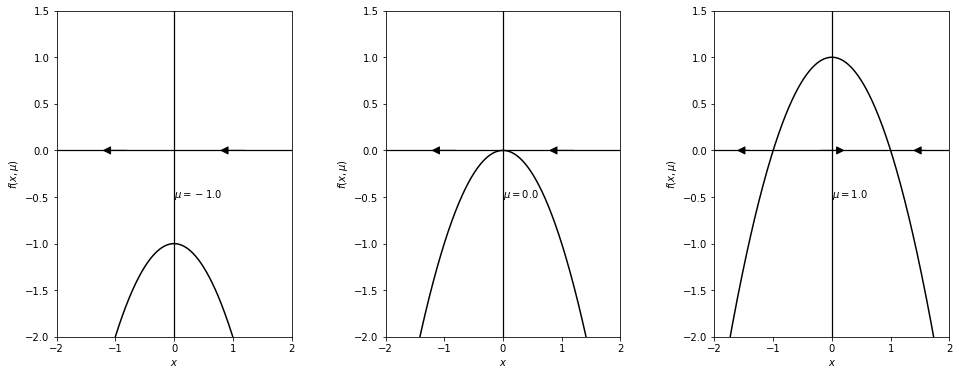

In [3]:
x = np.linspace(-2, 2, 401)
plot_dynamics(x)

In [5]:
def P_plus(mu):
    return np.sqrt(mu)

def P_minus(mu):
    return (-1) * np.sqrt(mu)

def plot_plane():
    mu_array = np.linspace(0, 2, 201)
    P_plus_array = P_plus(mu_array)
    P_minus_array = P_minus(mu_array)
    fig = plt.figure(figsize=(8, 5.25))
    fig.subplots_adjust(bottom=0.13, left=0.15)
    ax = fig.add_subplot(1,1,1)
    ax.plot(mu_array, P_plus_array, c="k", linestyle="solid", linewidth=1.5)
    ax.plot(mu_array, P_minus_array, c="k", linestyle=(0, (3, 7.5)), linewidth=1.5)
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2])
    xl = [-2, 2]; yl = [0, 0]
    xs = [0, 0]; xs2 = [1, 1]; xs3 = [-1, -1]; ys = [-2, 2]
    #ax.plot(xl, yl, c='k', linewidth=1.25)
    #ax.plot(xs, ys, c='k', linewidth=1.25)
    #ax.plot(xs2, ys, c='k', linewidth=1.25)
    #ax.plot(xs3, ys, c='k', linewidth=1.25)
    ax.set_xlabel(r"$\mu$"); ax.set_ylabel(r"$x$")
    """
    ax.annotate(text='',xy=(0,0), xytext=(0,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(0,-2), xytext=(0,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,1), xytext=(1,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,1), xytext=(1,-1), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,-2), xytext=(1,-1), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(-1,0), xytext=(-1,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(-1,-2), xytext=(-1,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    #ax.grid(True)
    """  
    #plt.savefig("./6.2_mu_x_plane.svg")
    plt.savefig("./saddle_node_mu_x_plane.eps")


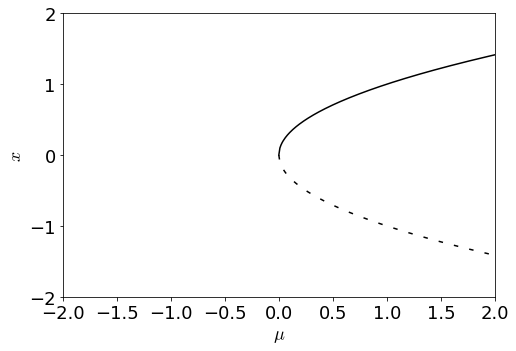

In [6]:
plot_plane()

In [6]:
def dynamics_scipy(t, z, mu):
    return mu - z**2 

def rk_solver(x_init, t_init, t_end, dt, mu):
    sol = solve_ivp(fun=dynamics_scipy, t_span=[t_init, t_end], y0=x_init, method='RK45', args=(mu,), dense_output=True, rtol=1e-6, atol=1e-10)
    t = np.linspace(t_init, t_end, int(t_end/dt)+1)
    z = sol.sol(t)
    return z 

def plot_trajectory_plane(mu1, sol_1, mu2, sol_2):
    mu_array = np.linspace(0, 2, 201)
    P_plus_array = P_plus(mu_array)
    P_minus_array = P_minus(mu_array)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(mu_array, P_plus_array, c="k", linestyle="solid", linewidth=1.5)
    ax.plot(mu_array, P_minus_array, c="k", linestyle=(0, (3, 7.5)), linewidth=1.5)
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2])
    xl = [-2, 2]; yl = [0, 0]
    xs = [0, 0]; xs2 = [1, 1]; xs3 = [-1, -1]; ys = [-2, 2]
    ax.plot(xl, yl, c='k', linewidth=1.25)
    ax.plot(xs, ys, c='k', linewidth=1.25)
    ax.plot(xs2, ys, c='k', linewidth=1.25)
    ax.plot(xs3, ys, c='k', linewidth=1.25)
    ax.annotate(text='',xy=(0,0), xytext=(0,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(0,-2), xytext=(0,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,1), xytext=(1,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,1), xytext=(1,-1), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(1,-2), xytext=(1,-1), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(-1,0), xytext=(-1,2), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    ax.annotate(text='',xy=(-1,-2), xytext=(-1,0), xycoords='data',\
            arrowprops=dict(facecolor='black', width=0, headwidth=7.0, headlength=7.0, shrink=0.4))
    #ax.grid(True)
    mu1_lst = [mu1 for i in range(len(sol_1))]
    mu2_lst = [mu2 for i in range(len(sol_2))]
    ax.plot(mu1_lst, sol_1, c='b')
    ax.plot(mu2_lst, sol_2, c='m')
    ax.annotate(text='',xy=(mu2,sol_2[0]), xytext=(mu1,sol_1[-1]), xycoords='data', color='red',\
            arrowprops=dict(facecolor='red', width=0, headwidth=5.0, headlength=5.0, shrink=0.01))
    ax.set_xlabel(r"$\mu$"); ax.set_ylabel(r"$x$")
    plt.savefig("./6.2_mu_x_plane_trajectory.svg")